In \[1\]:

    from pytrends.request import TrendReq
    import numpy as np
    import pandas as pd
    import matplotlib.pylab as plt

Data Collection Section

In \[2\]:

    '''
    This Part includes the Class and 
    functions that used for collecting 
    Data "Trends" with different approaches

    '''

    class Trends_Collection:
        
        #Class constructor for creating objectsand calling them
        def __init__(self,keywords=[''],category='0',lang='en-US'):
            self.keys=keywords
            self.cat=category
            self.lang=lang
            self.trends=TrendReq(hl=lang, tz=360)  
            
        
        #this function is used for Searching for Trends using specific words  
        def trends_scraping(self,time="today 3-m",geo='',kw=None,cat=None):
            
            #Specifying keywords
            k_list=kw
            
            #Specifying category
            ct=cat
            
            #Specifying the time to extract data
            tf=time
            
            #Specifying location
            g=geo

            if kw is None:
                k_list=self.keys
            if cat is None:
                ct=self.cat
                
            #build_payload function for searching by words
            self.trends.build_payload(kw_list=k_list,cat=ct,timeframe=tf,geo=g)
            
            #Interest Over Time DataFrame
            time_df = self.trends.interest_over_time()
            del  time_df["isPartial"]
            
            #Interest by Region DataFrame
            region_df=self.trends.interest_by_region()
            
            #Related queries Dictionary
            related_dic = self.trends.related_queries()
            
            return (time_df,region_df,related_dic)
           
        
        def get_top_trends(self):
            top=self.trends.trending_searches()
            return top
            

Data Collection Examples

In \[3\]:

    #Calling an Object and searching for a word
    t=Trends_Collection()
    df,df2,dic3=t.trends_scraping(kw=["Tesla"])

In \[4\]:

    #DataFrame describes number of search for "Tesla" over time "last 3 months"
    df.head()

Out\[4\]:

|            | Tesla |
|------------|-------|
| date       |       |
| 2021-12-12 | 60    |
| 2021-12-13 | 74    |
| 2021-12-14 | 87    |
| 2021-12-15 | 84    |
| 2021-12-16 | 79    |

In \[5\]:

    #DataFrame shows number of searches for "Tesla" by different regions
    df2[df2["Tesla"]>50]

Out\[5\]:

|               | Tesla |
|---------------|-------|
| geoName       |       |
| Austria       | 53    |
| Canada        | 76    |
| Denmark       | 74    |
| Germany       | 56    |
| Norway        | 100   |
| Serbia        | 60    |
| Singapore     | 84    |
| Sweden        | 69    |
| Switzerland   | 67    |
| United States | 66    |

In \[6\]:

    #DataFrame for showing the related quieries for the word "Tesla"
    df3=dic3["Tesla"]["top"]
    df3.head()

Out\[6\]:

|     | query         | value |
|-----|---------------|-------|
| 0   | tesla stock   | 100   |
| 1   | tesla model   | 82    |
| 2   | tesla price   | 58    |
| 3   | model 3 tesla | 39    |
| 4   | model 3       | 39    |

In \[7\]:

    #Getting Top Trends 
    top=t.get_top_trends()
    top.head()

Out\[7\]:

|     | 0                    |
|-----|----------------------|
| 0   | Tornado Watch        |
| 1   | Gregg Popovich       |
| 2   | Winter storm warning |
| 3   | Turning Red          |
| 4   | The Adam Project     |

Plots & charts Examples

In \[8\]:

    '''
    This Chart Describes the number of searches 
    for "Tesla" in the last 3 Months

    '''
    df.plot();

![](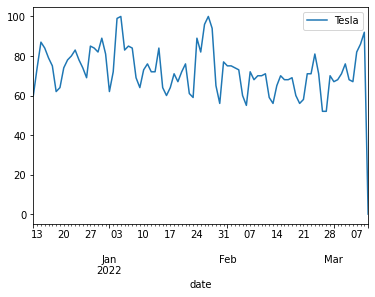%0A)

In \[9\]:

    '''
    This Bar Chart Describes the number of Searches for
    "Tesla" in different Regions in the last 3 months

    '''
    #Condition for getting only countries with high numbers of searches 
    df2[df2["Tesla"]>50].plot(kind="bar"); 
    plt.xticks(rotation=50);

![](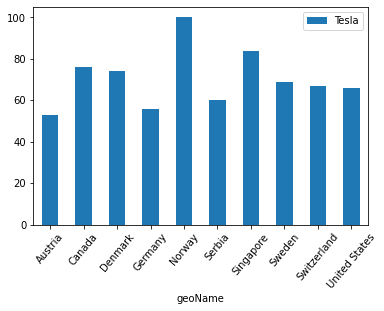%0A)